# 1- Data prepration

In [1]:
from seaborn import load_dataset
import pandas as pd

data = load_dataset('Diamonds')

In [2]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
X = data.drop('price', axis = 1)
y = data['price']

In [4]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [6]:
X.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [7]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [8]:
X['cut'].unique() #map

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
X['color'].unique() #one_hot_vector

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
X['clarity'].unique() #map

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
X['cut'] = X['cut'].map({'Ideal':4, 'Premium':3, 'Good':1, 'Very Good':2, 'Fair':0}).astype(int)

In [12]:
X['clarity'] = X['clarity'].map({'SI2':1, 'SI1':2, 'VS1':4, 'VS2':3, 'VVS2':5, 'VVS1':6, 'I1':0, 'IF':7}).astype(int)

In [13]:
cols = pd.get_dummies(X['color'])
X[cols.columns] = cols
X.drop('color', inplace=True, axis = 1)

In [14]:
X.head()

,carat,cut,clarity,depth,table,x,y,z,D,E,F,G,H,I,J
0,0.23,4,1,61.5,55.0,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,0,1


In [15]:
y[:5]

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

# ML models

1. Linear regression 
2. KNN regrssor - best param
3. SGDRegressor - best params
4. Ridge - best param
5. Lasso - feature importance, best param
6. LinearSVR - best param
7. SVR kernel = 'rbf' and 'poly' - best params
8. Decision Tree Regressor - best params

## Data preprocessing

In [16]:
X.shape

(53940, 15)

In [17]:
# split dataset
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [18]:
#scale dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train_org)
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [20]:
f = open('diamond_BUAN002.csv', 'w')
line  = 'Model_name,Model_params,Train_score,Test_score\n'
f.write(line)
f.close()

## 1. Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))

Train score: 0.9091
Test score: 0.9103


In [21]:
line = 'LinearRegression, ,' + str(lreg.score(X_train, y_train)) + ',' + str(lreg.score(X_test, y_test)) + '\n'
f = open('diamond_BUAN002.csv','a')
f.write(line)
f.close()

##### Plot - based on only one feature in the X

## 2- KNN Regressor 

In [22]:
from sklearn.neighbors import KNeighborsRegressor
train = []
test = []

for k in [1, 3, 5, 7, 9]:
    #create the model
    knn = KNeighborsRegressor(n_neighbors= k)
    # train the model on the train set
    knn.fit(X_train, y_train)
    train.append(knn.score(X_train, y_train))
    test.append(knn.score(X_tesplt.t, y_test))

Text(0.5, 0, 'n_neighbors')

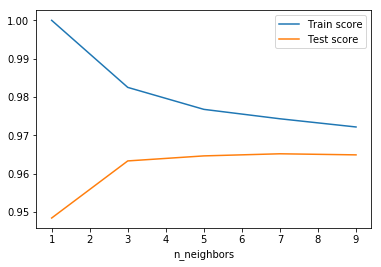

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot([1, 3, 5, 7, 9], train, label = 'Train score')
plt.plot([1, 3, 5, 7, 9], test, label = 'Test score')
plt.legend()
plt.xlabel('n_neighbors')

The best parameter is ``n_neighbors = 5``. 

In [24]:
f = open('diamond_BUAN002.csv', 'a')
line = 'KNeighborsRegressor, n_neighbors = 5, ' + str(train[2]) + ',' + str(test[2]) + '\n'
f.write(line)
f.close()

## 3- SGDRegressor

- ``max_iter in [1000, 5000, 10000]``
- ``penalty in ['l1', 'l2']``

In [25]:
from sklearn.linear_model import SGDRegressor

train_l1 = []
test_l1 = []
train_l2 = []
test_l2 = []

for max_iter in [1000, 5000, 10000]:
    #create the model
    sgd_l1 = SGDRegressor(max_iter = max_iter, penalty= 'l1')
    sgd_l2 = SGDRegressor(max_iter = max_iter, penalty= 'l2')
    
    #train the model
    sgd_l1.fit(X_train, y_train)
    sgd_l2.fit(X_train, y_train)
    
    #evaluation
    train_l1.append(sgd_l1.score(X_train, y_train))
    test_l1.append(sgd_l1.score(X_test, y_test))
    train_l2.append(sgd_l2.score(X_train, y_train))
    test_l2.append(sgd_l2.score(X_test, y_test))

Text(0.5, 0, 'max_iter')

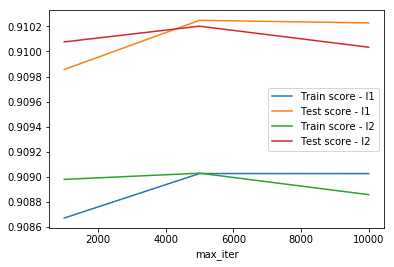

In [28]:
% matplotlib inline

plt.plot([1000, 5000, 10000], train_l1 , label = 'Train score - l1')
plt.plot([1000, 5000, 10000], test_l1 , label = 'Test score - l1')
plt.plot([1000, 5000, 10000], train_l2 , label = 'Train score - l2')
plt.plot([1000, 5000, 10000], test_l2 , label = 'Test score - l2')

plt.legend()
plt.xlabel('max_iter')

In [29]:
f = open('diamond_BUAN002.csv', 'a')
line = 'SGDRegressor, penalty = l1 - max_iter = 5000, ' + str(train_l1[1]) + ',' + str(test_l1[1]) + '\n'
f.write(line)
f.close()

## 4- Ridge

In [33]:
from sklearn.linear_model import Ridge

train = []
test= []

for alpha in [0.01, 0.1, 1, 10, 100]: 
    #create the model 
    ridge = Ridge(alpha = alpha)
    
    #train the model
    ridge.fit(X_train, y_train)
    
    #evalutation
    train.append(ridge.score(X_train,y_train))
    test.append(ridge.score(X_test, y_test))

Text(0.5, 0, 'Alpha')

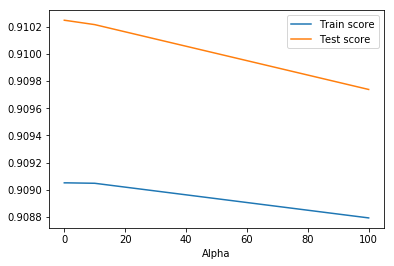

In [35]:
%matplotlib inline

plt.plot([0.01, 0.1, 1, 10, 100], train, label = 'Train score')
plt.plot([0.01, 0.1, 1, 10, 100], test, label = 'Test score')

plt.legend()
plt.xlabel('Alpha')

In [36]:
f = open('diamond_BUAN002.csv', 'a')
line = 'Ridge, alpha = 0.01, ' + str(train[0]) + ',' + str(test[0]) + '\n'
f.write(line)
f.close()